# Python в инженерных расчетах. Лекция 11.
<hr style="border:2px solid gray">

#### План занятия:
1. **Подготовка массива данных для запуска машинного обучения. Библиотека Pandas;**
2. **Создание и оценка модели в виде простой линейной регрессии (LinearRegression);**
3. **Создание и оценка модели в виде нейронной  (MLPRegressor);**

In [485]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt

# Импортируем библиотеку для работы с электронными таблицами pandas
import pandas as pd

# Импортируем необходимые нам модули библиотеки машинного обучения sklearn  
from sklearn.model_selection import train_test_split # модуль разбиения на данные для обучения и для проверки
from sklearn.preprocessing import MinMaxScaler # модуль для кодирования матрицы признаков

from sklearn.linear_model import LinearRegression # модуль для обучения методом линейной регрессии
from sklearn.neural_network import MLPRegressor # модуль для обучения с помощью нейронной сети

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # методы оценки ошибки модели




## 1. Подготовка массива данных для запуска машинного обучения. Библиотека Pandas.
<hr style="border:2px solid gray">

In [486]:
# Чтение данныех из Excel подобного файла
df = pd.read_csv('../data/mech_properties.csv') 

In [487]:
# посмотрим что получилось
df.head(10) # первые 10 строк массива

,Standard,SteelGrade,"wt_C, %","wt_Si, %","wt_Mn, %","wt_P, %","wt_S, %","wt_V, %","wt_Nb, %","wt_Ti, %","wt_Al, %","wt_B, %","wt_Cr, %","wt_Ni, %","wt_Cu, %","wt_As, %",YieldStress,TensileStrength,Elongation
0,ГОСТ 1050-2013,05кп,0.0510,0.0255,0.3400,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,0.0,0.0,0.0
1,ГОСТ 1050-2013,08кп,0.1095,0.0255,0.4625,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,0.0,0.0,0.0
2,ГОСТ 1050-2013,08пс,0.1010,0.1520,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,0.0,0.0,0.0
3,ГОСТ 1050-2013,08,0.1095,0.3400,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,215.6,352.0,36.3
4,ГОСТ 1050-2013,10кп,0.1295,0.0595,0.4625,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,0.0,0.0,0.0
5,ГОСТ 1050-2013,10пс,0.1295,0.1520,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,0.0,0.0,0.0
6,ГОСТ 1050-2013,10,0.1295,0.3400,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,225.5,363.0,34.1
7,ГОСТ 1050-2013,11кп,0.1095,0.0510,0.4700,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,0.0,0.0,0.0
8,ГОСТ 1050-2013,15кп,0.1795,0.0595,0.4625,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.2125,0.255,0.255,0,0.0,0.0,0.0
9,ГОСТ 1050-2013,15пс,0.1795,0.1520,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.2125,0.255,0.255,0,0.0,0.0,0.0


In [488]:
# если нам нужно посмотреть значение конкретной ячейки
print (df['YieldStress'].iloc[3])

215.6


In [489]:
# посмотрим на размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (182, 19)


In [490]:
# Удаляем все лишние столбцы (будем строить модель зависимости предела текучести от хим. состава )
df.drop(columns=['Standard', 'SteelGrade', 'TensileStrength', 'Elongation'], inplace=True) 
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (182, 15)


In [491]:
# удаляем все строки, где предел текучести (YieldStress) равен нулю
df.drop(df[df['YieldStress'] == 0].index, inplace=True)
# удаляем все столбцы, где все все значения массовой доли элемента равны 0 (в данном примере это wt_As)
df = df.loc[:, (df != 0).any(axis=0)]
# Перегружаем индексы
df.reset_index(drop=True, inplace=True)
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (170, 14)


In [492]:
# Проверяем есть ли в таблице повторения
df.duplicated().sum()

np.int64(2)

In [493]:
# Удалим все дупликаты
df = df.drop_duplicates()
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (168, 14)


In [494]:
# Проверяем, что все значения определены, пусть даже они нулевые
df.isna().sum()

wt_C, %        0
wt_Si, %       0
wt_Mn, %       0
wt_P, %        0
wt_S, %        0
wt_V, %        0
wt_Nb, %       0
wt_Ti, %       0
wt_Al, %       0
wt_B, %        0
wt_Cr, %       0
wt_Ni, %       0
wt_Cu, %       0
YieldStress    0
dtype: int64

In [495]:
# Резюме по данным
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"wt_C, %",168.0,0.164265,0.141606,0.0085,0.08500,0.11900,0.195500,0.78800
"wt_Si, %",168.0,0.515378,0.329870,0.0000,0.34000,0.42500,0.541875,1.87000
"wt_Mn, %",168.0,1.240789,0.659906,0.1700,0.60500,1.19000,1.740000,2.55000
"wt_P, %",168.0,0.047180,0.025196,0.0000,0.02550,0.04250,0.068000,0.10200
"wt_S, %",168.0,0.021554,0.009320,0.0000,0.01275,0.02125,0.029750,0.03825
"wt_V, %",168.0,0.017304,0.052364,0.0000,0.00000,0.00000,0.000000,0.25500
"wt_Nb, %",168.0,0.033893,0.037609,0.0000,0.00000,0.00000,0.076500,0.09000
"wt_Ti, %",168.0,0.067318,0.075841,0.0000,0.00000,0.07000,0.102000,0.25500
"wt_Al, %",168.0,0.306946,0.563283,0.0000,0.00000,0.01725,0.108500,1.70225
"wt_B, %",168.0,0.001629,0.003883,0.0000,0.00000,0.00000,0.004250,0.04250


In [496]:
# Анализ уникальности данных для каждого столбца
df.nunique()

wt_C, %         43
wt_Si, %        14
wt_Mn, %        30
wt_P, %         15
wt_S, %          9
wt_V, %          5
wt_Nb, %        10
wt_Ti, %        10
wt_Al, %        13
wt_B, %          5
wt_Cr, %        11
wt_Ni, %         2
wt_Cu, %         3
YieldStress    113
dtype: int64

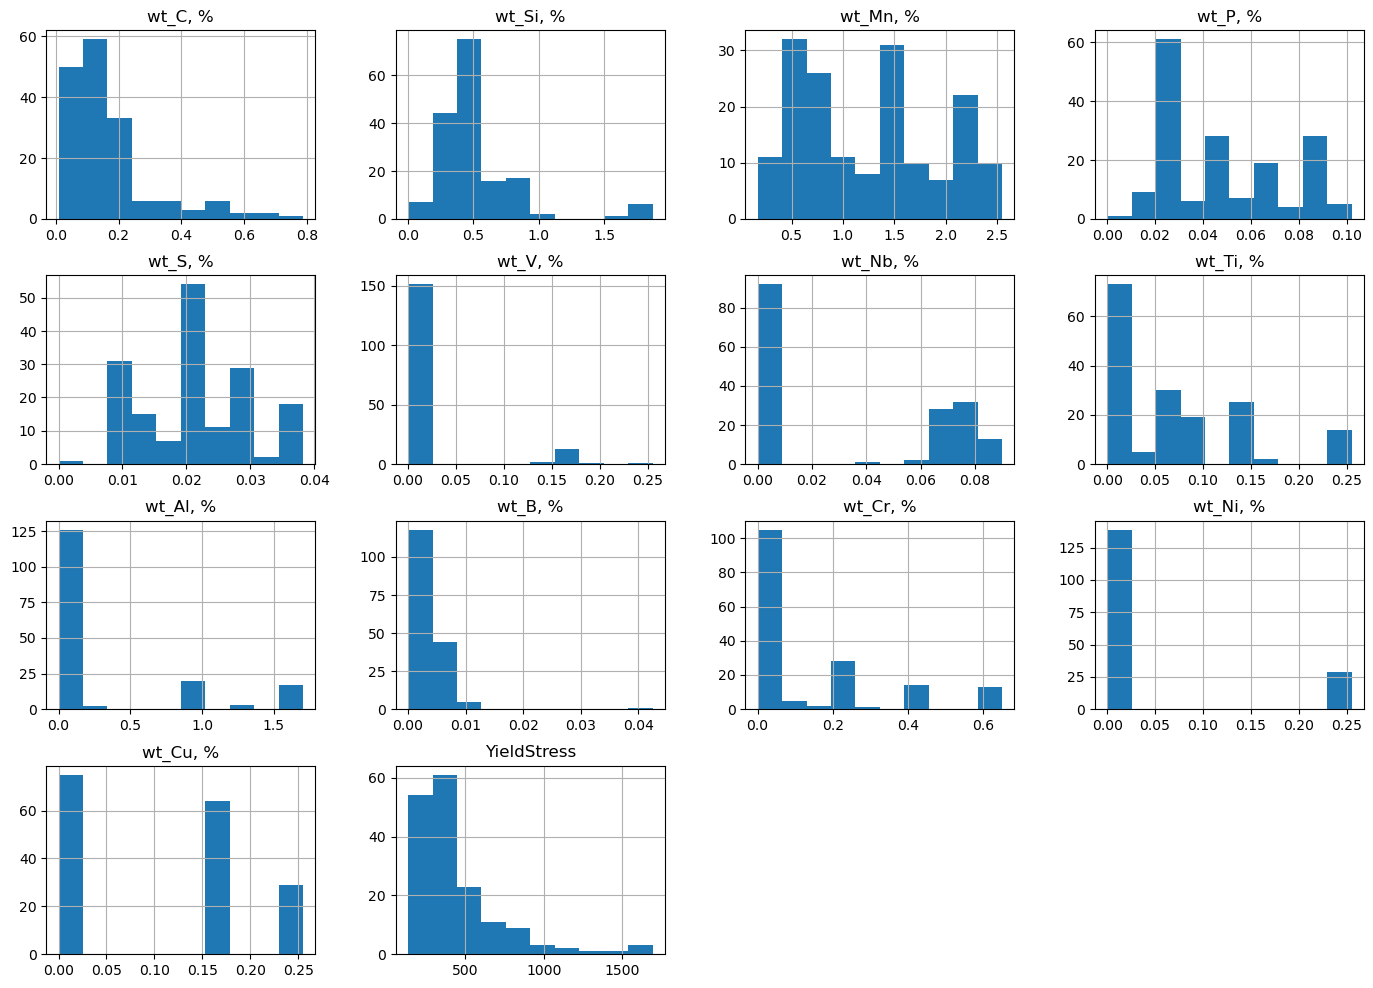

In [497]:
# Резюме по данным в виде гистограммы
df.hist(figsize=(17,12));

In [498]:
# Корреляция предела текучести от содержания того или иного элемента
df.corrwith(df["YieldStress"])

wt_C, %        0.264999
wt_Si, %       0.465602
wt_Mn, %       0.586090
wt_P, %       -0.217411
wt_S, %       -0.433448
wt_V, %        0.142243
wt_Nb, %       0.282095
wt_Ti, %      -0.167620
wt_Al, %       0.315167
wt_B, %        0.469471
wt_Cr, %       0.502105
wt_Ni, %      -0.130988
wt_Cu, %       0.161161
YieldStress    1.000000
dtype: float64

In [499]:
# давайте выкинем из массива маетриалы, где значение предела текучести выше 1000 МПа (что бы проще было обучать модель в будущем)
df = df[df['YieldStress'] <= 1000]
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (161, 14)


In [500]:
# Разбиваем данные на признаки и целевую функцию
X = df.drop(columns=['YieldStress']) # Удаляем не нужный столбец с пределом текучести
y = df['YieldStress'] # целевая функция - столбец с пределом текучести

In [501]:
# Посмотрим на X
X.tail(10) # конец массива

,"wt_C, %","wt_Si, %","wt_Mn, %","wt_P, %","wt_S, %","wt_V, %","wt_Nb, %","wt_Ti, %","wt_Al, %","wt_B, %","wt_Cr, %","wt_Ni, %","wt_Cu, %"
151,0.1955,0.850,2.295,0.0425,0.00850,0.0,0.070,0.0700,0.85225,0.00425,0.45,0.0,0.17
152,0.2210,1.870,2.125,0.0425,0.00850,0.0,0.070,0.0700,1.70225,0.00425,0.65,0.0,0.17
153,0.1955,1.530,2.125,0.0340,0.00850,0.0,0.070,0.0700,0.85225,0.00425,0.25,0.0,0.17
154,0.2210,1.870,2.550,0.0425,0.00850,0.0,0.070,0.0700,1.70225,0.00425,0.65,0.0,0.17
155,0.1275,0.680,2.125,0.0425,0.00850,0.0,0.070,0.0700,0.85225,0.00425,0.65,0.0,0.17
157,0.1955,1.020,2.465,0.0425,0.00850,0.0,0.070,0.0700,0.85225,0.00425,0.65,0.0,0.17
158,0.1700,1.020,2.295,0.0425,0.00850,0.0,0.070,0.0700,0.85225,0.00425,0.45,0.0,0.17
163,0.0850,0.051,0.510,0.0255,0.02125,0.0,0.068,0.1275,0.17225,0.00085,0.00,0.0,0.17
164,0.0850,0.425,1.445,0.0255,0.02125,0.0,0.085,0.0765,0.17225,0.00085,0.17,0.0,0.17
165,0.0850,0.510,1.530,0.0255,0.00850,0.0,0.085,0.0425,0.08650,0.00425,0.17,0.0,0.17


In [502]:
# Посмотрим на y
y.iloc[75:85] # выводим середину массива (точнее объекта pd.series)

75    835.0
76    190.0
77    223.7
78    210.0
79    225.0
80    234.0
81    254.0
82    282.0
83    266.0
84    328.0
Name: YieldStress, dtype: float64

In [503]:
# разбиваем данные на данные для обучения и данные для проверки модели (обычно 10% от всего массива)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

# Переводим признаки в кодированный масштаб
scaler = MinMaxScaler(feature_range=(-1, 1)) # создаем объект класса MinMaxScaler 
X_train_scaled = scaler.fit_transform(X_train) # нормализуем массив признаков для обучения
X_test_scaled = scaler.transform(X_test) # нормализыем массив признаков для проверки модели

In [504]:
# Посмотрим на массив признаков для обучения
X_train.head(10)

,"wt_C, %","wt_Si, %","wt_Mn, %","wt_P, %","wt_S, %","wt_V, %","wt_Nb, %","wt_Ti, %","wt_Al, %","wt_B, %","wt_Cr, %","wt_Ni, %","wt_Cu, %"
148,0.0850,0.340,1.360,0.00000,0.00000,0.000,0.00,0.00,0.00000,0.00000,0.0000,0.000,0.000
98,0.1700,0.510,1.445,0.08500,0.03825,0.000,0.00,0.00,0.00000,0.00000,0.0000,0.000,0.000
16,0.2295,0.340,0.955,0.02550,0.02975,0.000,0.00,0.00,0.00000,0.00000,0.2550,0.255,0.255
75,0.2125,0.680,2.295,0.06800,0.01275,0.255,0.00,0.00,1.70225,0.00425,0.0000,0.000,0.000
18,0.3380,0.340,0.955,0.02550,0.02975,0.000,0.00,0.00,0.00000,0.00000,0.2550,0.255,0.255
12,0.6380,0.340,0.755,0.02550,0.02975,0.000,0.00,0.00,0.00000,0.00000,0.2125,0.255,0.255
9,0.5380,0.340,0.755,0.02550,0.02975,0.000,0.00,0.00,0.00000,0.00000,0.2125,0.255,0.255
31,0.0680,0.425,0.595,0.07225,0.02550,0.000,0.00,0.00,0.01725,0.00000,0.0000,0.000,0.000
152,0.2210,1.870,2.125,0.04250,0.00850,0.000,0.07,0.07,1.70225,0.00425,0.6500,0.000,0.170
97,0.1700,0.510,1.445,0.08500,0.03825,0.000,0.00,0.00,0.00000,0.00000,0.0000,0.000,0.000


In [505]:
# Массив X_train_scaled уже не является объектом класса pandas dataframe, это уже NumPy array.
# Так что его можем вывести просто задав диапазон
X_train_scaled[:5, :]

array([[-8.03720334e-01, -6.36363636e-01,  2.22044605e-16,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00],
       [-5.85631815e-01, -4.54545455e-01,  7.14285714e-02,
         6.66666667e-01,  1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00],
       [-4.32969852e-01, -6.36363636e-01, -3.40336134e-01,
        -5.00000000e-01,  5.55555556e-01, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -2.15384615e-01,  1.00000000e+00,
         1.00000000e+00],
       [-4.76587556e-01, -2.72727273e-01,  7.85714286e-01,
         3.33333333e-01, -3.33333333e-01,  1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -8.00000000e-01, -1.00000000e

## 2. Создание и оценка модели в виде простой линейной регрессии.
<hr style="border:2px solid gray">

Построим модель в виде линейной регрессии (класс **`LinearRegression`** библиотеки sklearn):
$$
\hat{y} = b_0 + \sum_{i=1}^n b_i x_i
$$


и оценим полученную модель с помощью **`коэффициента детерминации`** и **`среднеквадратической ошибки`** .

### Коэффициент детерминации $ R^2 $


Метрика, показывающая долю дисперсии зависимой переменной, объяснённую моделью:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

где:  
- $ y_i $ — истинные значения,  
- $ \hat{y}_i $ — предсказанные моделью значения,  
- $ \bar{y} $ — среднее истинных значений.

Чем ближе $ R^2 $ к 1, тем лучше модель описывает данные.
Эту метрику можно расчитать с помощью метода  **`r2_score`** класса **`sklearn.metrics`** 


### Среднеквадратическая ошибка (RMSE)

Метрика, измеряющая среднее квадратичное отклонение предсказанных значений от истинных:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

где:  
- $ n $ — количество наблюдений.

RMSE измеряется в тех же единицах, что и исходная переменная, что делает её интерпретацию более интуитивной. Чем ближе RMSE к 0, тем точнее модель.
Эту метрику можно расчитать с помощью метода **`mean_squared_error`** класса **`sklearn.metrics`** (нужно извлечь квадратный корень из реультата).



In [506]:
# обучение по данным для обучения моделью линейной регрессии
regr = LinearRegression(fit_intercept = True) # создаем объект класса линейная регрессия с расчетом свободного коэффициента
regr.fit(X_train_scaled, y_train) # наполняем модель данными для обучения

# Расчитываем отклик по данным для проверки
y_pred = regr.predict(X_test_scaled)

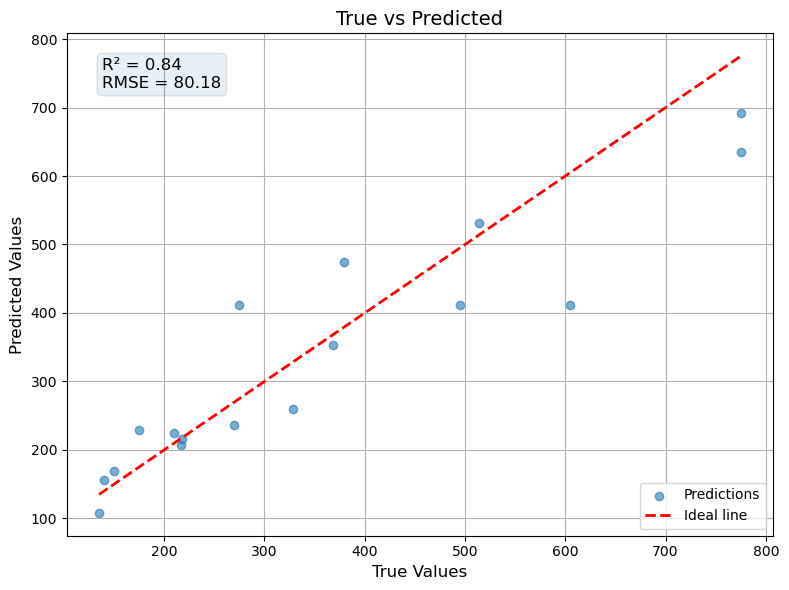

In [507]:
# Функция для сравнения тестовых и предсказанных значений
def plot_true_vs_predicted(y_true, y_pred, title="True vs Predicted", figsize=(8, 6)):
    """
    Строит график истинных значений vs предсказанных.
    
    Параметры:
        y_true (array-like): Истинные значения
        y_pred (array-like): Предсказанные значения
        title (str): Заголовок графика
        figsize (tuple): Размер графика
    """
    # Вычисляем метрики
    r2 = r2_score(y_true, y_pred) # коэффициент детерминации
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) #  среднеквадратическая ошибка

    # Строим график
    plt.figure(figsize=figsize)
    plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2, label='Ideal line')

    # Добавляем метрики на график
    metrics_text = f'R² = {r2:.2f}\nRMSE = {rmse:.2f}'
    plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.1))

    # Оформление графика
    plt.title(title, fontsize=14)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_true_vs_predicted (y_test, y_pred)

## 3. Создание и оценка модели в виде нейронной сети.
<hr style="border:2px solid gray">

### Нейронная сеть (MLPRegressor)

Многослойный перцептрон (Multi-Layer Perceptron) для задач регрессии — это искусственная нейронная сеть прямого распространения, состоящая из множества взаимосвязанных нейронов, организованных в последовательные слои.

#### Архитектура сети:
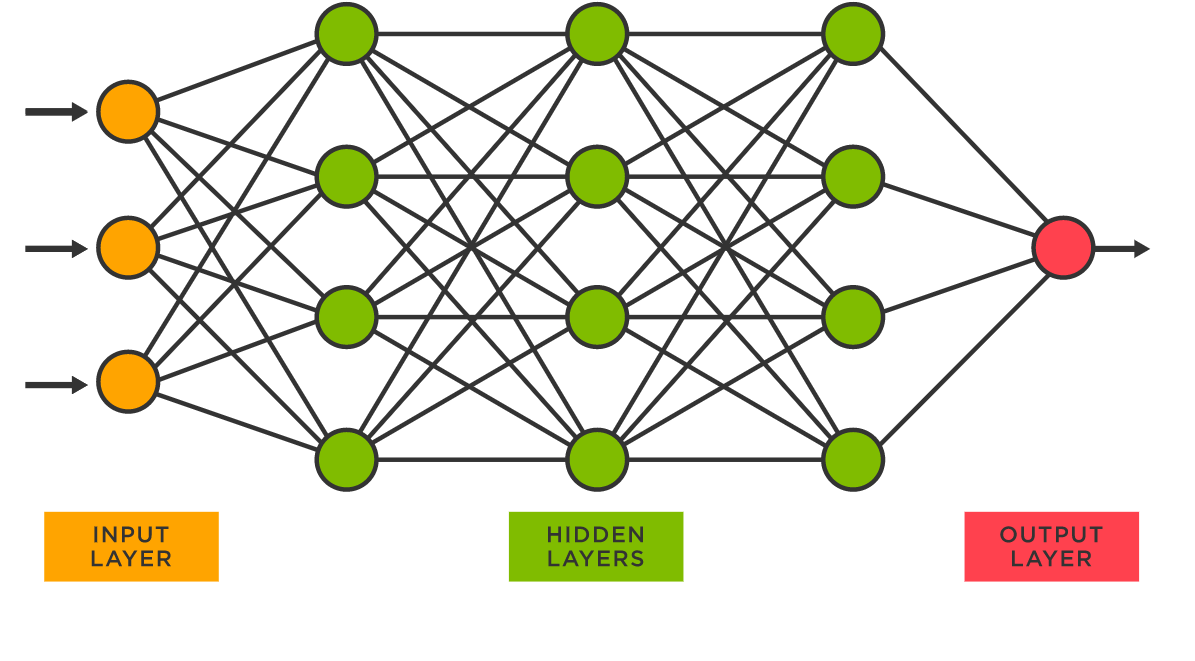

картинка отсюда: https://vitalflux.com/sklearn-neural-network-regression-example-mlpregressor/


#### Ключевые компоненты:

- **Входной слой** — принимает исходные признаки данных (X₁, X₂, X₃, ...)
- **Скрытые слои** — выполняют нелинейные преобразования через функции активации (ReLU, tanh, sigmoid)
- **Выходной слой** — возвращает предсказанное непрерывное значение ŷ
- **Веса и смещения** — параметры, оптимизируемые в процессе обучения
- **Функция потерь** — обычно MSE (среднеквадратичная ошибка) для регрессии

#### Математическое представление:
Для одного нейрона: 
$$z = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b$$
$$a = f(z)$$
где $f$ — функция активации.

Обучение сети происходит методом обратного распространения ошибки (backpropagation) с использованием алгоритмов оптимизации (Adam, SGD).

In [508]:
# Создаём нейросеть
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),   # два скрытых слоя: 64 и 32 нейрона (попробуйте (128, 64, 32))
    activation='relu', # возможные варианты ['relu', 'tanh', 'logistic', 'identity']
    solver='adam', # возможные варианты ['adam', 'sgd', 'lbfgs', ]
    max_iter=10000,
    random_state=42,
    early_stopping=True,           # остановка при отсутствии улучшения
    validation_fraction=0.1        # часть данных для валидации
)

# Обучение
mlp.fit(X_train_scaled, y_train)


print(f'Количество итераций: {len(mlp.validation_scores_)}, последний R² = {mlp.validation_scores_[-1]:2f}')  

Количество итераций: 2195, последний R² = 0.888574


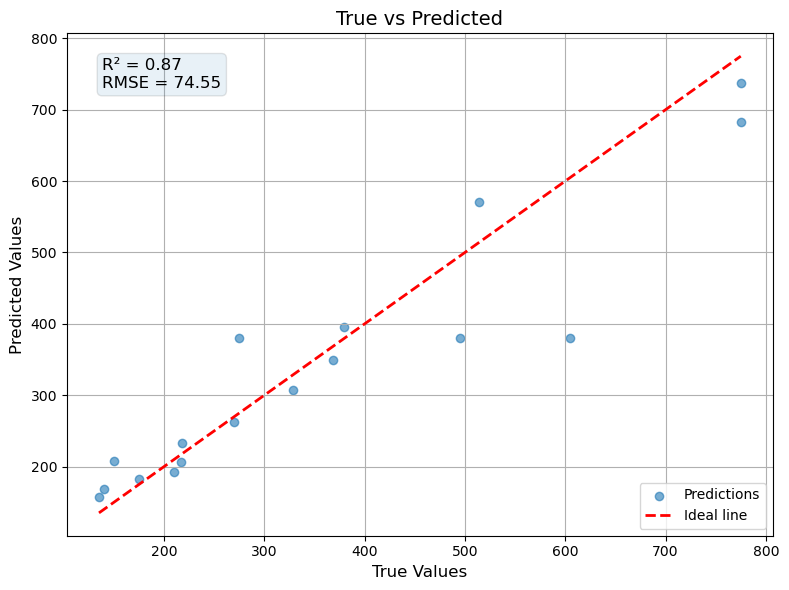

In [509]:
# Расчитываем отклик по данным для проверки
y_pred = mlp.predict(X_test_scaled)
# посмотрим на результат
plot_true_vs_predicted (y_test, y_pred)

## 4. Заключение
### Использованные в лекции методы библиотеки Pandas

- **`pd.read_csv()` / `pd.read_excel()`** — чтение данных из CSV/Excel файлов в DataFrame.  
- **`pd.DataFrame()`** — создание DataFrame из различных структур данных.  
- **`df.head()`** — просмотр первых нескольких строк DataFrame для быстрого ознакомления с данными.  
- **`df.describe()`** — получение статистической сводки по числовым столбцам.  
- **`df.info()`** — получение информации о DataFrame (типы данных, количество ненулевых значений).  
- **`df.columns`** — получение списка названий столбцов DataFrame.  
- **`df['column_name']`** — выбор отдельного столбца из DataFrame.  
- **`df.loc[]` и `df.iloc[]`** — выбор данных по меткам или индексам.  
- **`df.isnull()`** — проверка на наличие пропущенных значений.  
- **`df.dropna()`** — удаление строк или столбцов с пропущенными значениями.  
- **`df.fillna()`** — заполнение пропущенных значений указанным значением или методом.  
- **`df.groupby()`** — группировка данных по одному или нескольким столбцам для агрегации.  
- **`df.sort_values()`** — сортировка DataFrame по значениям указанных столбцов.  
- **`df.plot()`** — построение графиков непосредственно из DataFrame.  
- **`df.to_csv()` / `df.to_excel()`** — сохранение DataFrame в файлы CSV/Excel формата.